In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import mutual_info_regression


In [108]:
df=pd.read_csv('playground.csv')

In [110]:
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [112]:
df.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [116]:
df = klib.data_cleaning(df)

Shape of cleaned data: (230130, 6) - Remaining NAs: 8871


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 7.59 MB (-72.08%)



In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        230130 non-null  int32   
 1   date      230130 non-null  category
 2   country   230130 non-null  category
 3   store     230130 non-null  category
 4   product   230130 non-null  category
 5   num_sold  221259 non-null  float32 
dtypes: category(4), float32(1), int32(1)
memory usage: 2.9 MB


In [120]:
df['date']=pd.to_datetime(df.date,format='mixed')
df['year']=df.date.dt.year
df['month']=df.date.dt.month
df['day']=df.date.dt.day

In [122]:
df.drop(['date'],axis=1,inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        230130 non-null  int32   
 1   country   230130 non-null  category
 2   store     230130 non-null  category
 3   product   230130 non-null  category
 4   num_sold  221259 non-null  float32 
 5   year      230130 non-null  int32   
 6   month     230130 non-null  int32   
 7   day       230130 non-null  int32   
dtypes: category(3), float32(1), int32(4)
memory usage: 5.0 MB


In [126]:
df.head()

,id,country,store,product,num_sold,year,month,day
0,0,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1
1,1,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,3,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1


In [130]:
df=klib.data_cleaning(df)

Shape of cleaned data: (230130, 8) - Remaining NAs: 8871


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-0.0%)



In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        230130 non-null  int32   
 1   country   230130 non-null  category
 2   store     230130 non-null  category
 3   product   230130 non-null  category
 4   num_sold  221259 non-null  float32 
 5   year      230130 non-null  int32   
 6   month     230130 non-null  int32   
 7   day       230130 non-null  int32   
dtypes: category(3), float32(1), int32(4)
memory usage: 5.0 MB


In [134]:
df['num_sold']=df['num_sold'].fillna(df['num_sold'].mean(), inplace=False)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        230130 non-null  int32   
 1   country   230130 non-null  category
 2   store     230130 non-null  category
 3   product   230130 non-null  category
 4   num_sold  230130 non-null  float32 
 5   year      230130 non-null  int32   
 6   month     230130 non-null  int32   
 7   day       230130 non-null  int32   
dtypes: category(3), float32(1), int32(4)
memory usage: 5.0 MB


# encoding 

In [139]:
cat_col=df.select_dtypes(include=['string','category']).columns

In [141]:
cardinality = df[cat_col].nunique()

In [143]:
cardinality

country    6
store      3
product    5
dtype: int64

In [145]:
encoder=LabelEncoder()
for col in cat_col:
    if cardinality[col]>10:
        df[col]=encoder.fit_transform(df[col])
    else:
        df=pd.get_dummies(df,columns=[col],drop_first=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          230130 non-null  int32  
 1   num_sold                    230130 non-null  float32
 2   year                        230130 non-null  int32  
 3   month                       230130 non-null  int32  
 4   day                         230130 non-null  int32  
 5   country_Finland             230130 non-null  bool   
 6   country_Italy               230130 non-null  bool   
 7   country_Kenya               230130 non-null  bool   
 8   country_Norway              230130 non-null  bool   
 9   country_Singapore           230130 non-null  bool   
 10  store_Premium Sticker Mart  230130 non-null  bool   
 11  store_Stickers for Less     230130 non-null  bool   
 12  product_Kaggle              230130 non-null  bool   
 13  product_Kaggle

In [149]:
one_hot_cols = df.select_dtypes(include=bool).columns
df[one_hot_cols] = df[one_hot_cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          230130 non-null  int32  
 1   num_sold                    230130 non-null  float32
 2   year                        230130 non-null  int32  
 3   month                       230130 non-null  int32  
 4   day                         230130 non-null  int32  
 5   country_Finland             230130 non-null  int32  
 6   country_Italy               230130 non-null  int32  
 7   country_Kenya               230130 non-null  int32  
 8   country_Norway              230130 non-null  int32  
 9   country_Singapore           230130 non-null  int32  
 10  store_Premium Sticker Mart  230130 non-null  int32  
 11  store_Stickers for Less     230130 non-null  int32  
 12  product_Kaggle              230130 non-null  int32  
 13  product_Kaggle

In [151]:
one_hot_cols = df.select_dtypes(include=bool).columns
df[one_hot_cols] = df[one_hot_cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          230130 non-null  int32  
 1   num_sold                    230130 non-null  float32
 2   year                        230130 non-null  int32  
 3   month                       230130 non-null  int32  
 4   day                         230130 non-null  int32  
 5   country_Finland             230130 non-null  int32  
 6   country_Italy               230130 non-null  int32  
 7   country_Kenya               230130 non-null  int32  
 8   country_Norway              230130 non-null  int32  
 9   country_Singapore           230130 non-null  int32  
 10  store_Premium Sticker Mart  230130 non-null  int32  
 11  store_Stickers for Less     230130 non-null  int32  
 12  product_Kaggle              230130 non-null  int32  
 13  product_Kaggle

In [153]:
df=klib.data_cleaning(df)

Shape of cleaned data: (230130, 16) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-0.0%)



In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          230130 non-null  int32  
 1   num_sold                    230130 non-null  float32
 2   year                        230130 non-null  int32  
 3   month                       230130 non-null  int32  
 4   day                         230130 non-null  int32  
 5   country_finland             230130 non-null  int32  
 6   country_italy               230130 non-null  int32  
 7   country_kenya               230130 non-null  int32  
 8   country_norway              230130 non-null  int32  
 9   country_singapore           230130 non-null  int32  
 10  store_premium_sticker_mart  230130 non-null  int32  
 11  store_stickers_for_less     230130 non-null  int32  
 12  product_kaggle              230130 non-null  int32  
 13  product_kaggle

# data analysis

<Axes: xlabel='num_sold', ylabel='day'>

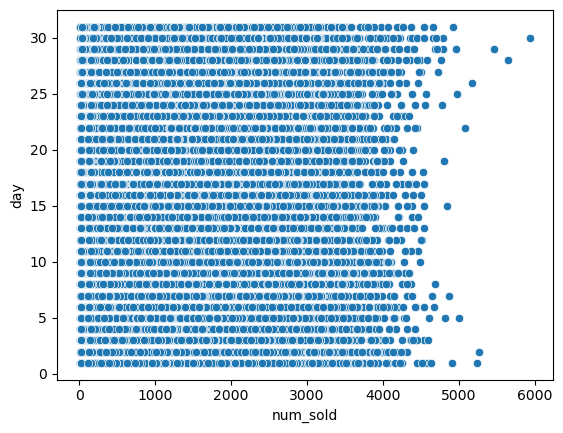

In [157]:
sns.scatterplot(data=df,x='num_sold',y='day')

<Axes: xlabel='num_sold', ylabel='country_italy'>

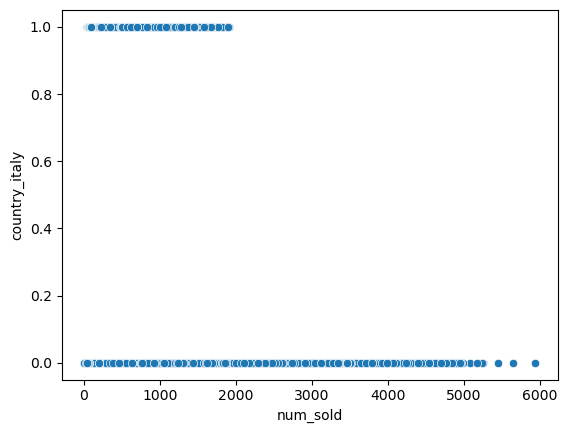

In [159]:
sns.scatterplot(data=df,x='num_sold',y='country_italy')

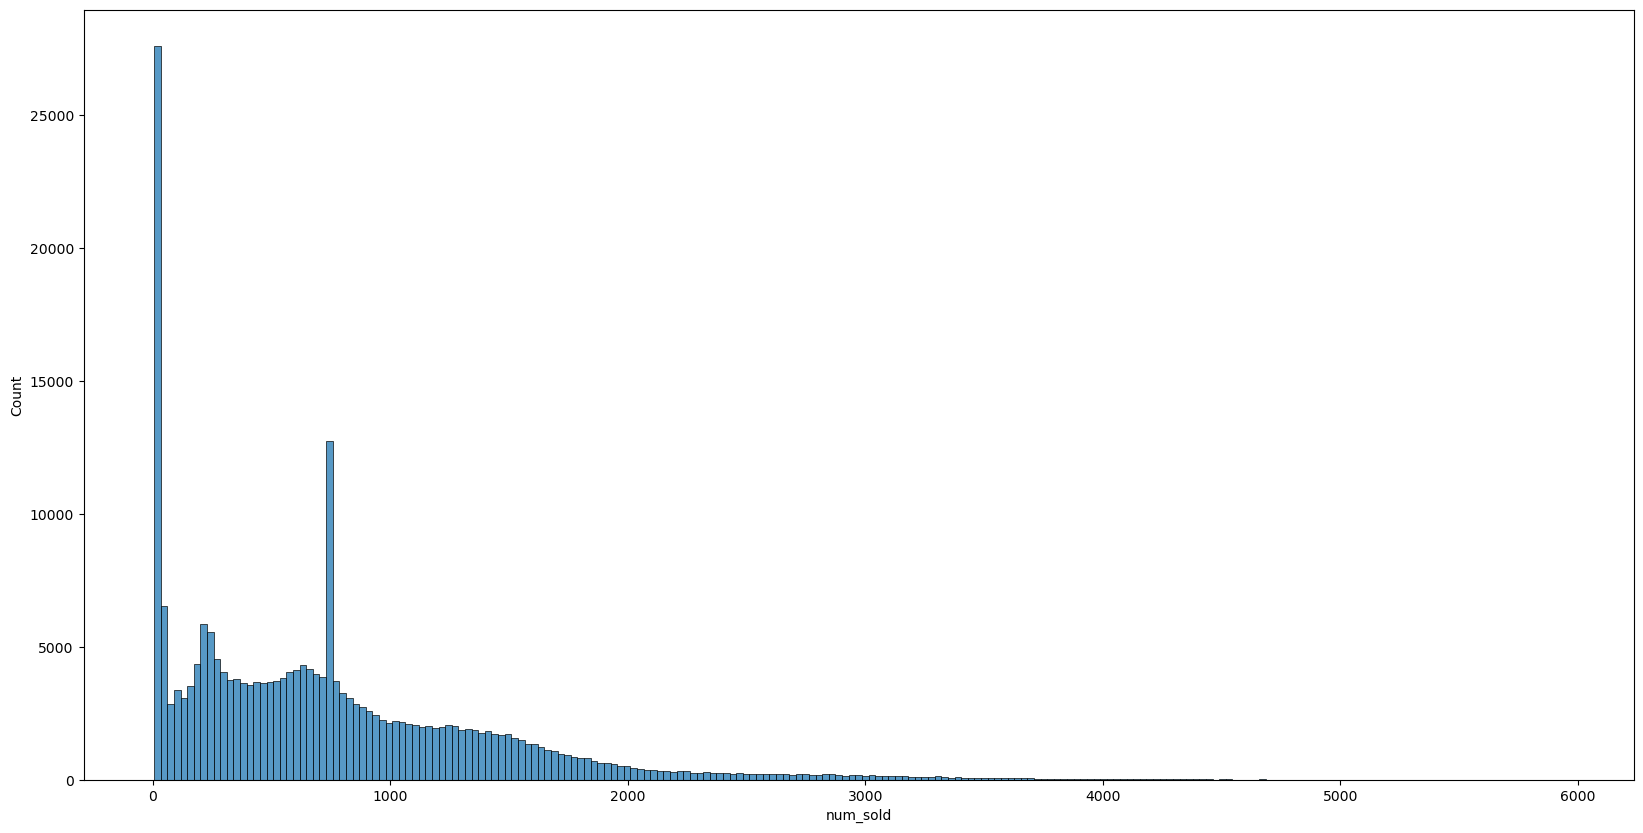

In [161]:
plt.figure(figsize=(20,10))

sns. histplot(data=df,x='num_sold')
plt.show()

<Axes: xlabel='num_sold', ylabel='Density'>

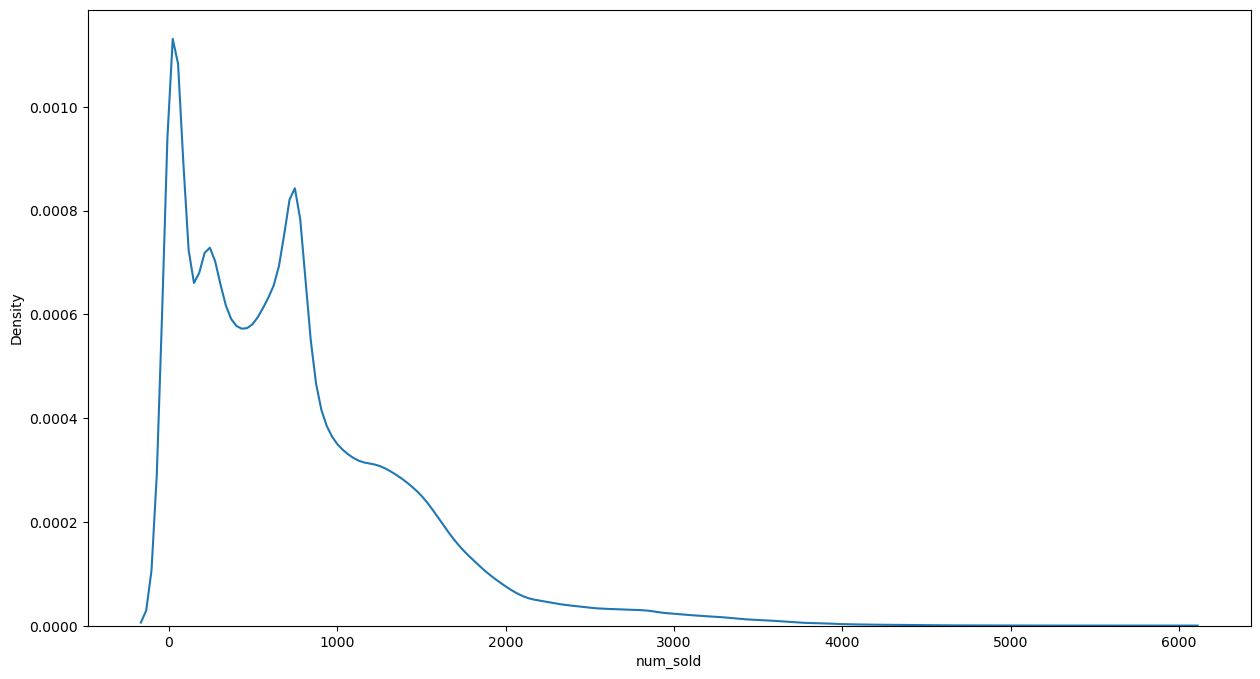

In [163]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df, x="num_sold")

<Axes: xlabel='month', ylabel='num_sold'>

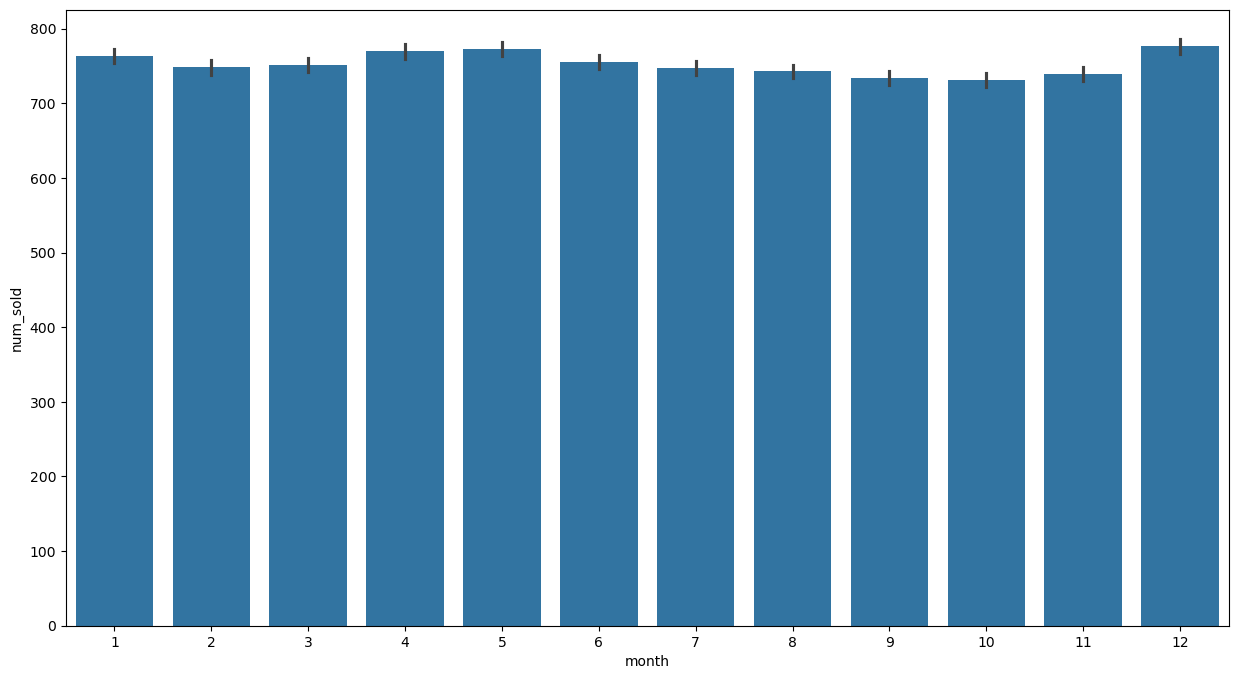

In [165]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='month',y='num_sold')

In [167]:
df['num_sold'].value_counts()

num_sold
752.527405     8871
5.000000       1947
6.000000       1703
16.000000      1434
7.000000       1382
               ... 
3621.000000       1
3683.000000       1
4139.000000       1
3349.000000       1
3996.000000       1
Name: count, Length: 4038, dtype: int64

# model

In [177]:
X = df.drop(columns=['num_sold'])

In [179]:
X

,id,year,month,day,country_finland,country_italy,country_kenya,country_norway,country_singapore,store_premium_sticker_mart,store_stickers_for_less,product_kaggle,product_kaggle_tiers,product_kerneler,product_kerneler_dark_mode
0,0,2010,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,2010,1,1,0,0,0,0,0,0,0,1,0,0,0
2,2,2010,1,1,0,0,0,0,0,0,0,0,1,0,0
3,3,2010,1,1,0,0,0,0,0,0,0,0,0,1,0
4,4,2010,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016,12,31,0,0,0,0,1,1,0,0,0,0,0
230126,230126,2016,12,31,0,0,0,0,1,1,0,1,0,0,0
230127,230127,2016,12,31,0,0,0,0,1,1,0,0,1,0,0
230128,230128,2016,12,31,0,0,0,0,1,1,0,0,0,1,0


In [181]:
y = df['num_sold']

In [183]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [185]:
X_train.shape

(161091, 15)

In [187]:
y_train.shape

(161091,)

In [189]:
X_test.shape

(34520, 15)

In [191]:
X_valid.shape

(34519, 15)

In [193]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [195]:
metrics = {
    "r2": r2_score(y_test,y_pred),
    "mse": mean_squared_error(y_test,y_pred)
}

In [197]:
metrics

{'r2': 0.6880980024253699, 'mse': 145335.50118753992}

In [199]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [203]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [205]:
y_pred__scaled = model.predict(X_test_scaled)

In [207]:
y_pred_scaled

array([ 278.95728457, 1408.10906984,  671.13628181, ..., 1204.7103406 ,
       1167.27221614,  667.42180641])

In [213]:
metrics = {
    "r2": r2_score(y_test,y_pred_scaled),
    "mse": mean_squared_error(y_test,y_pred_scaled)
}

In [215]:
metrics

{'r2': 0.6880980024253522, 'mse': 145335.50118754816}

In [223]:
mutual_info = mutual_info_regression(X, y)


mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})


mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)
mutual_info_df

,Feature,Mutual Information
6,country_kenya,0.426131
11,product_kaggle,0.134899
0,id,0.126027
7,country_norway,0.121836
5,country_italy,0.106166
3,day,0.093370
12,product_kaggle_tiers,0.092825
9,store_premium_sticker_mart,0.077020
13,product_kerneler,0.074817
8,country_singapore,0.065110


In [221]:
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Feature Importance (F-Score)': feature_importance
})


importance_df = importance_df.sort_values(by='Feature Importance (F-Score)', ascending=False)
import pandas as pd





print(importance_df)

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [225]:
# Assuming importance_df contains your feature importance data
importance_df['Feature Importance (F-Score)'] = importance_df['Feature Importance (F-Score)'].astype(float)

# Display the updated DataFrame
print(importance_df)


NameError: name 'importance_df' is not defined

In [229]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)


DecisionTreeRegressor()

In [231]:
y_pred = model.predict(X_test)

In [233]:
metrics = {
    "r2": r2_score(y_test,y_pred),
    "mse": mean_squared_error(y_test,y_pred)
}

In [235]:
metrics

{'r2': 0.9570102426295949, 'mse': 20031.734268914355}

In [244]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [249]:
y_pred = model.predict(X_test)

In [250]:
metrics = {
    "r2": r2_score(y_test,y_pred),
    "mse": mean_squared_error(y_test,y_pred)
}

In [251]:
metrics

{'r2': 0.9711398399412232, 'mse': 13447.832521468008}